In [1]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice1.csv" , index_col=0)

In [2]:
df.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
768,769,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,2006,WD,Normal,216837,3696,33,2.0,-8.660254e-01,0.5
1065,1066,60,RL,80.0,14000,Pave,NaN,Reg,Lvl,AllPub,...,0,2010,WD,Normal,328000,3566,44,3.5,8.660254e-01,-0.5
188,189,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,2009,WD,Alloca,153337,2310,0,3.0,1.224647e-16,-1.0
395,396,20,RL,68.0,9571,Pave,NaN,Reg,Lvl,AllPub,...,0,2010,WD,Normal,129000,2288,0,2.0,1.224647e-16,-1.0


In [3]:
df.shape

(1460, 75)

In [5]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'YrSold', 

In [6]:
#OverallQual جدول تحديد الوسيط لتصنيفات المتغير  
median_SalePrice_OvalQ= pd.pivot_table(df, index="OverallQual", values="SalePrice" , aggfunc="median")
median_SalePrice_OvalQ

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108000.0
5,133000.0
6,160000.0
7,200141.0
8,269750.0
9,345000.0


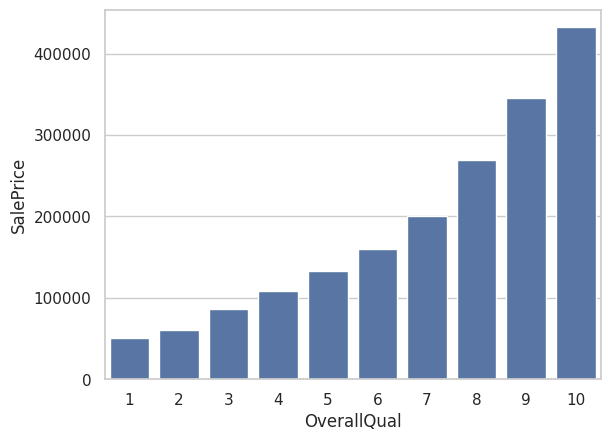

In [7]:
#  سعر العقار في ضوء تصنيفه
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
_=sns.barplot( x="OverallQual", y="SalePrice", data=median_SalePrice_OvalQ.reset_index())

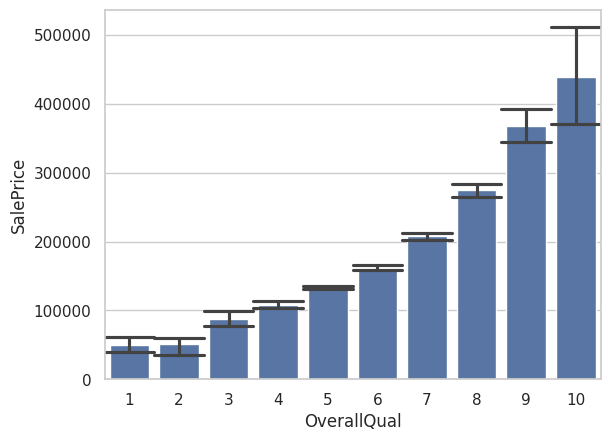

In [8]:
#معدل  سعر العقار في ضوء تصنيفه
import numpy as np
_=sns.barplot( x="OverallQual", y="SalePrice", data=df , estimator=np.mean,  capsize=True)

/tmp/ipykernel_10328/4150603441.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  _=sns.barplot( x="OverallQual", y="SalePrice", data=df,  ci="sd")


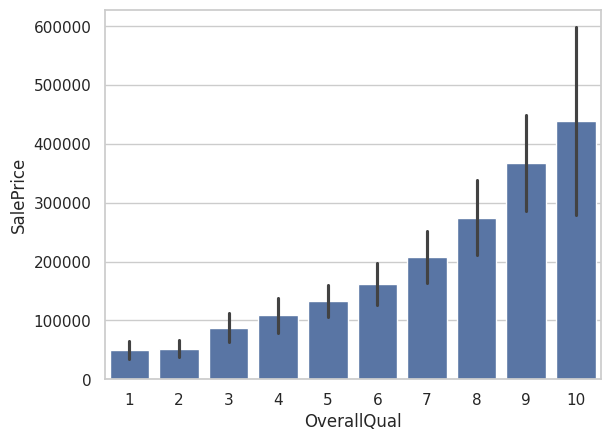

In [9]:
# المعدل هو الذي يعتمد في الأساس 
_=sns.barplot( x="OverallQual", y="SalePrice", data=df,  ci="sd")

In [10]:
#OverallQual  معدا ووسيط المتغير  
df.groupby("OverallQual").SalePrice.agg(["mean", "median"]).T.round(2)

OverallQual,1,2,3,4,5,6,7,8,9,10
mean,50150.0,51770.33,87473.75,108420.66,133523.35,161603.03,207716.42,274735.54,367513.02,438588.39
median,50150.0,60000.00,86250.00,108000.00,133000.00,160000.00,200141.00,269750.00,345000.00,432390.00


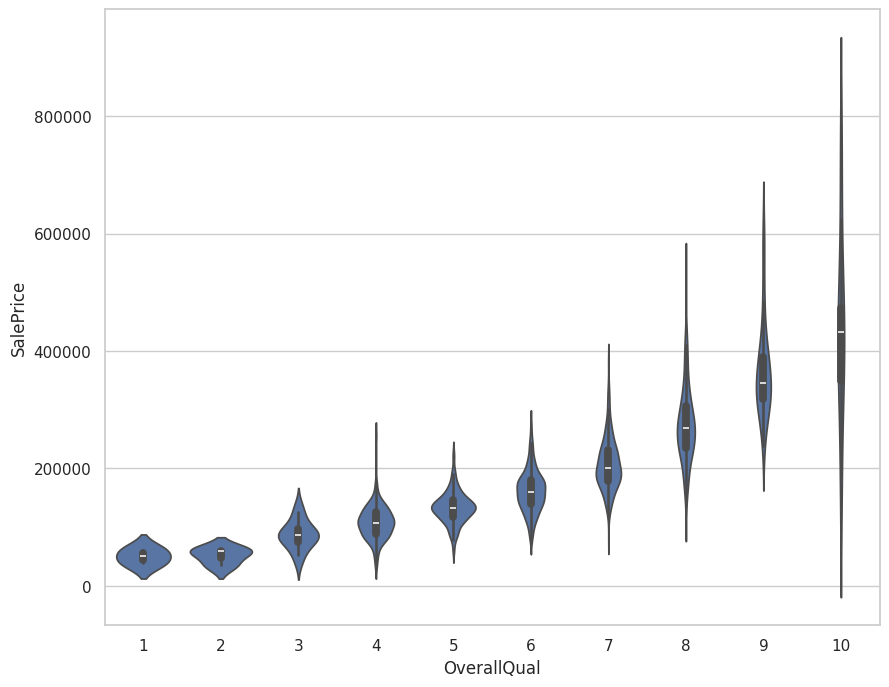

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
_=sns.violinplot( x="OverallQual", y="SalePrice", data=df )

In [12]:
# تحديد المتغيرات التي تقل تصنيفاتها على 4 
for col in df.select_dtypes(exclude="number").columns:
    if df[col].nunique()< 4:
        print(f" {col} :   {df[col].unique()} values " )

 Street :   ['Pave' 'Grvl'] values 
 Alley :   [nan 'Grvl' 'Pave'] values 
 Utilities :   ['AllPub' 'NoSeWa'] values 
 LandSlope :   ['Gtl' 'Mod' 'Sev'] values 
 MasVnrType :   ['BrkFace' nan 'Stone' 'BrkCmn'] values 
 CentralAir :   ['Y' 'N'] values 
 GarageFinish :   ['RFn' 'Unf' 'Fin' nan] values 
 PavedDrive :   ['Y' 'N' 'P'] values 
 PoolQC :   [nan 'Ex' 'Fa' 'Gd'] values 


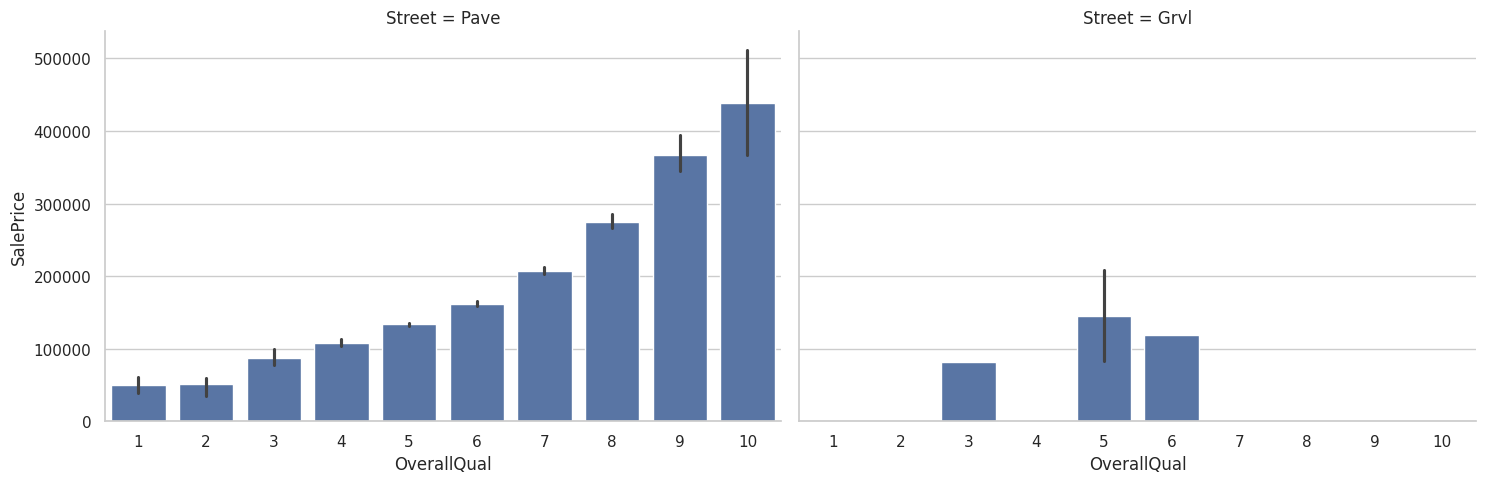

In [13]:
#  معدل  سعر العقار في ضوء تصنيفه حسب نوعية تعبيد الطريق


_=sns.catplot( x="OverallQual", y="SalePrice", col="Street",kind="bar",  data=df, height=5, aspect=1.5)